Data Science
Exercise 1
se21m024
Thomas Stummer
Small Dataset: Heart Disease (this notebook)
Big Dataset: Census Income (other notebook)

Data taken from:
https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Data Creators:
1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

# Import necessary dependencies

In [145]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import seaborn as sns
import math as math
import itertools as it

%matplotlib inline

# Load and merge datasets

In [170]:
# Only the database of Cleveland with the subset of 14 attributes is taken

columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

cleveland_raw_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data', sep=',', names = columns)

# Maybe todo: import data from 3 other clincs as well
hungarian_raw_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data', sep=',', names = columns)
switzerland_raw_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data', sep=',', names = columns)
va_raw_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data', sep=',', names = columns)
raw_data = pd.concat([cleveland_raw_data, hungarian_raw_data, switzerland_raw_data, va_raw_data])

#raw_data = cleveland_raw_data

# re-shuffle records just to randomize data points
raw_data = raw_data.sample(frac=1, random_state=42).reset_index(drop=True)

raw_data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,36.0,1.0,2.0,120,166,0,0,180,0,0.0,?,?,?,0
1,45.0,1.0,2.0,140,224,1,0,122,0,0.0,?,?,?,0
2,48.0,1.0,4.0,160,329,0,0,92,1,1.5,2,?,?,1
3,59.0,1.0,4.0,164.0,176.0,1.0,2.0,90.0,0.0,1.0,2.0,2.0,6.0,3
4,40.0,0.0,4.0,150,392,0,0,130,0,2.0,2,?,6,1


# Show dataset features and values

In [171]:

#raw_data = pd.read_csv('C:\\Users\\thomas.stummer\\Documents\\Jupyter\\Exercise1\\Data Sets\\Heart Disease\\_testStuff.data', sep=',',
#raw_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data', sep=',',
#names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])

data=raw_data


# pd.options.display.max_rows = 4000

# Helper functions

def roundElementToIntSafe(y):
    try:
        return int(float(y))
    except:
        return None

def roundToInt(x):
    return x.apply(lambda value: roundElementToIntSafe(value))

def parseFloatElementSafe(y):
    try:
        return float(y)
    except:
        return None

def parseFloat(x):
    return x.apply(lambda value: parseFloatElementSafe(value)) 


### Parse columns, assign categories, remove invalid records

numericalColumns = []
categoryColumns = []
numericalCategoryColumns = []

def processColumn(data, column, isFloat=False, categoryMapping=None, categories=None):

    # Parse
    if not isFloat:
        data[column] = roundToInt(data[column])
    else:
        data[column] = parseFloat(data[column])

    # (optional) Filter records that contain one or more invalid columns
    #data = data.drop(data[data[column].isnull()].index)

    # Append to global array
    if categoryMapping is None:
        numericalColumns.append(column)
    else:
        numericalCategoryColumns.append(column)
        categoryColumn = column + '_cat'
        categoryColumns.append(categoryColumn)
        data[categoryColumn] = data[column].apply(categoryMapping)
    	
        # (optional) Filter records that contain one or more invalid columns
        #data = data.drop(data[data[categoryColumn].isnull()].index)

        # Add category
        data[categoryColumn] = pd.Categorical(data[categoryColumn], categories=categories)

    return data

# age
processColumn(data=data, column='age')

# sex
data = processColumn(data=data, column='sex',
categoryMapping=(lambda value: 'male' if value == 1 else 'female' if value == 0 else None), 
categories=['male', 'female'])

# chest pain type
data = processColumn(data=data, column='cp',
categoryMapping=(lambda value: 'typical angina' if value == 1 else 'atypical angina' if value == 2 else 'non-anginal pain' if value == 3 else 'asymptomatic' if value == 4 else None), 
categories=['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'])

#  resting blood pressure (in mm Hg on admission to the hospital) 
data = processColumn(data=data, column='trestbps')

# serum cholestoral in mg/dl 
data = processColumn(data=data, column='chol')

# fasting blood sugar > 120 mg/dl
data = processColumn(data=data, column='fbs',
categoryMapping=(lambda value: 'True' if value == 1 else 'False' if value == 0 else None), 
categories=['True', 'False'])

# resting electrocardiographic results
data = processColumn(data=data, column='restecg',
categoryMapping=(lambda value: 'normal' if value == 0 else 'abnormality' if value == 1 else 'hypertrophy' if value == 2 else None),
categories=['normal', 'abnormality', 'hypertrophy'])

# maximum heart rate achieved 
data = processColumn(data=data, column='thalach')

# exercise induced angina
data = processColumn(data=data, column='exang',
categoryMapping=(lambda value: 'Yes' if value == 1 else 'No' if value == 0 else None),
categories=['Yes', 'No'])

# ST depression induced by exercise relative to rest 
data = processColumn(data=data, column='oldpeak', isFloat=True)

# slope of the peak exercise ST segment
data = processColumn(data=data, column='slope',
categoryMapping=(lambda value: 'upsloping' if value == 1 else 'flat' if value == 2 else 'downsloping' if value == 3 else None), 
categories=['upsloping', 'flat', 'downsloping'])

# number of major vessels (0-3) colored by flourosopy
data = processColumn(data=data, column='ca')

# thal
data = processColumn(data=data, column='thal',
categoryMapping=(lambda value: 'normal' if value == 3 else 'fixed defect' if value == 6 else 'reversable defect' if value == 7 else None),
categories=['normal', 'fixed defect', 'reversable defect'])

# diagnosis of heart disease (angiographic disease status)
data = processColumn(data=data, column='num',
categoryMapping=(lambda value: '< 50% diameter narrowing' if value == 0 else '> 50% diameter narrowing' if value == 1 else None), 
categories=['< 50% diameter narrowing', '> 50% diameter narrowing'])

data.head()



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,thal,num,sex_cat,cp_cat,fbs_cat,restecg_cat,exang_cat,slope_cat,thal_cat,num_cat
0,36,1,2,120.0,166.0,0.0,0.0,180.0,0.0,0.0,...,NaN,0,male,atypical angina,False,normal,No,NaN,NaN,< 50% diameter narrowing
1,45,1,2,140.0,224.0,1.0,0.0,122.0,0.0,0.0,...,NaN,0,male,atypical angina,True,normal,No,NaN,NaN,< 50% diameter narrowing
2,48,1,4,160.0,329.0,0.0,0.0,92.0,1.0,1.5,...,NaN,1,male,asymptomatic,False,normal,Yes,flat,NaN,> 50% diameter narrowing
3,59,1,4,164.0,176.0,1.0,2.0,90.0,0.0,1.0,...,6.0,3,male,asymptomatic,True,hypertrophy,No,flat,fixed defect,NaN
4,40,0,4,150.0,392.0,0.0,0.0,130.0,0.0,2.0,...,6.0,1,female,asymptomatic,False,normal,No,flat,fixed defect,> 50% diameter narrowing


# Exploratory Data Analysis and Visualizations

## Descriptive Statistics

In [172]:
subset_attributes = numericalColumns
negativeDiagnosis = round(data[data['num'] == 0][subset_attributes].describe(),2)
positiveDiagnosis = round(data[data['num'] == 1][subset_attributes].describe(),2)
pd.concat([negativeDiagnosis, positiveDiagnosis], axis=1, keys=['< 50% diameter narrowing', '> 50% diameter narrowing'])

< 50% diameter narrowing                                           \
                           age trestbps    chol thalach oldpeak      ca   
count                   411.00   391.00  392.00  391.00  390.00  165.00   
mean                     50.55   129.91  227.91  148.80    0.42    0.28   
std                       9.43    16.87   75.83   23.61    0.72    0.64   
min                      28.00    80.00    0.00   69.00   -1.10    0.00   
25%                      43.00   120.00  199.00  134.50    0.00    0.00   
50%                      51.00   130.00  228.00  151.00    0.00    0.00   
75%                      57.00   140.00  269.00  167.50    0.80    0.00   
max                      76.00   190.00  564.00  202.00    4.20    3.00   

      > 50% diameter narrowing                                          
                           age trestbps    chol thalach oldpeak     ca  
count                   265.00   252.00  258.00  252.00  250.00  58.00  
mean                     53.53   132.86  195.26  131.04    1.00   0.74  
std                       8.74    19.85  124.17   23.40    1.04   0.87  
min                      31.00    92.00    0.00   72.00   -2.60   0.00  
25%                      48.00   120.00  150.75  115.00    0.00   0.00  
50%                      55.00   130.00  229.00  130.00    1.00   1.00  
75%                      59.00   145.00  272.75  150.00    1.80   1.00  
max                      75.00   200.00  603.00  195.00    5.00   3.00

# Univariate Analysis

## Visualizing one dimension

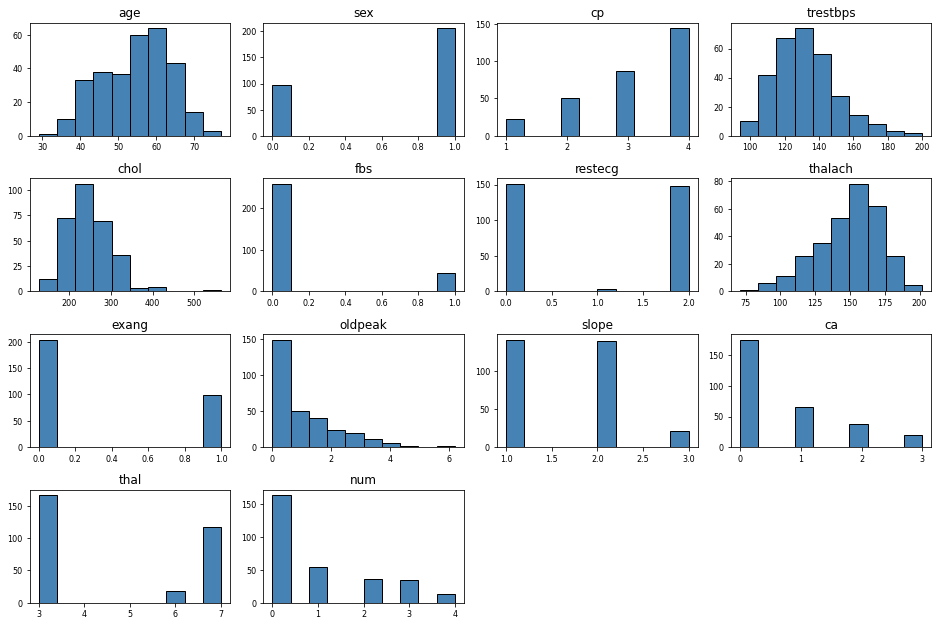

In [159]:


data.hist(bins=10, color='steelblue', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 2.2, 2.2))   


### Discrete, categorical attribute in 1-D

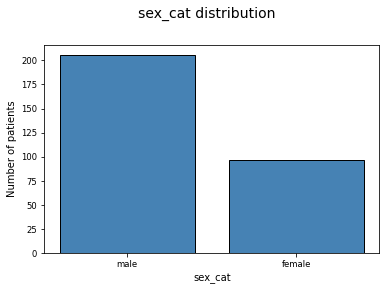

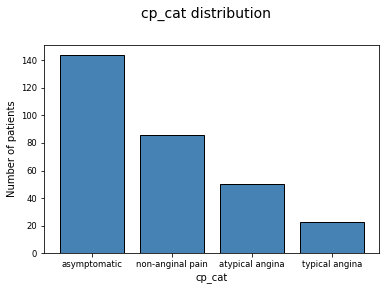

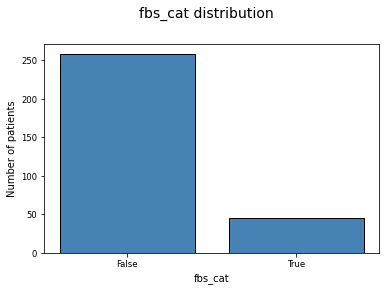

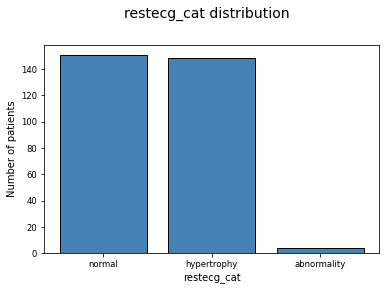

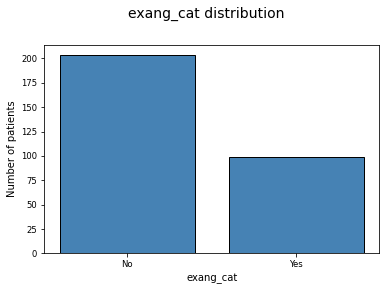

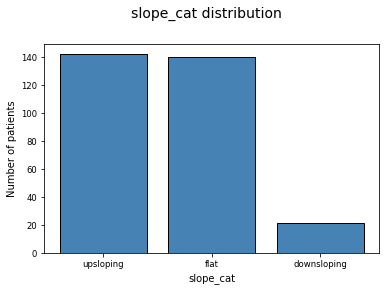

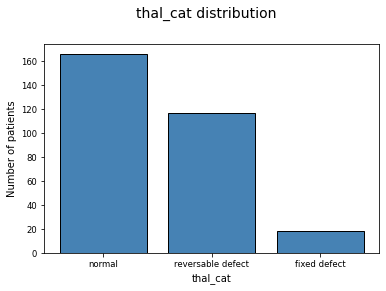

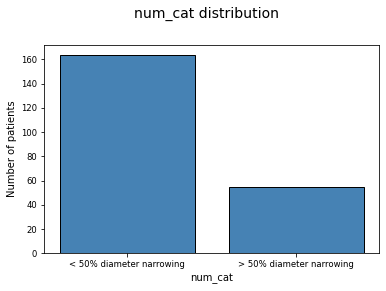

In [160]:
def printFigure(column):
        fig = plt.figure(figsize = (6, 4))
        title = fig.suptitle(column + " distribution", fontsize=14)
        fig.subplots_adjust(top=0.85, wspace=0.3)

        ax = fig.add_subplot(1, 1, 1)
        ax.set_xlabel(column)
        ax.set_ylabel("Number of patients") 
        w_q = data[column].value_counts()
        w_q = (list(w_q.index), list(w_q.values))
        ax.tick_params(axis='both', which='major', labelsize=8.5)
        bar = ax.bar(w_q[0], w_q[1], color='steelblue', 
                edgecolor='black', linewidth=1)

for column in categoryColumns:
        printFigure(column)


# Multivariate Analysis

## Visualizing two dimensions

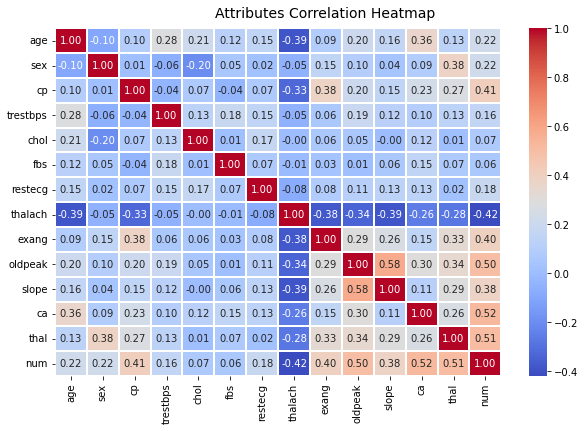

In [161]:
f, ax = plt.subplots(figsize=(10, 6))
corr = data.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
            linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Attributes Correlation Heatmap', fontsize=14)

Interpretation:
  In the heatmap as well as in the pairwise plots, a correlation between age and thalach is observed.


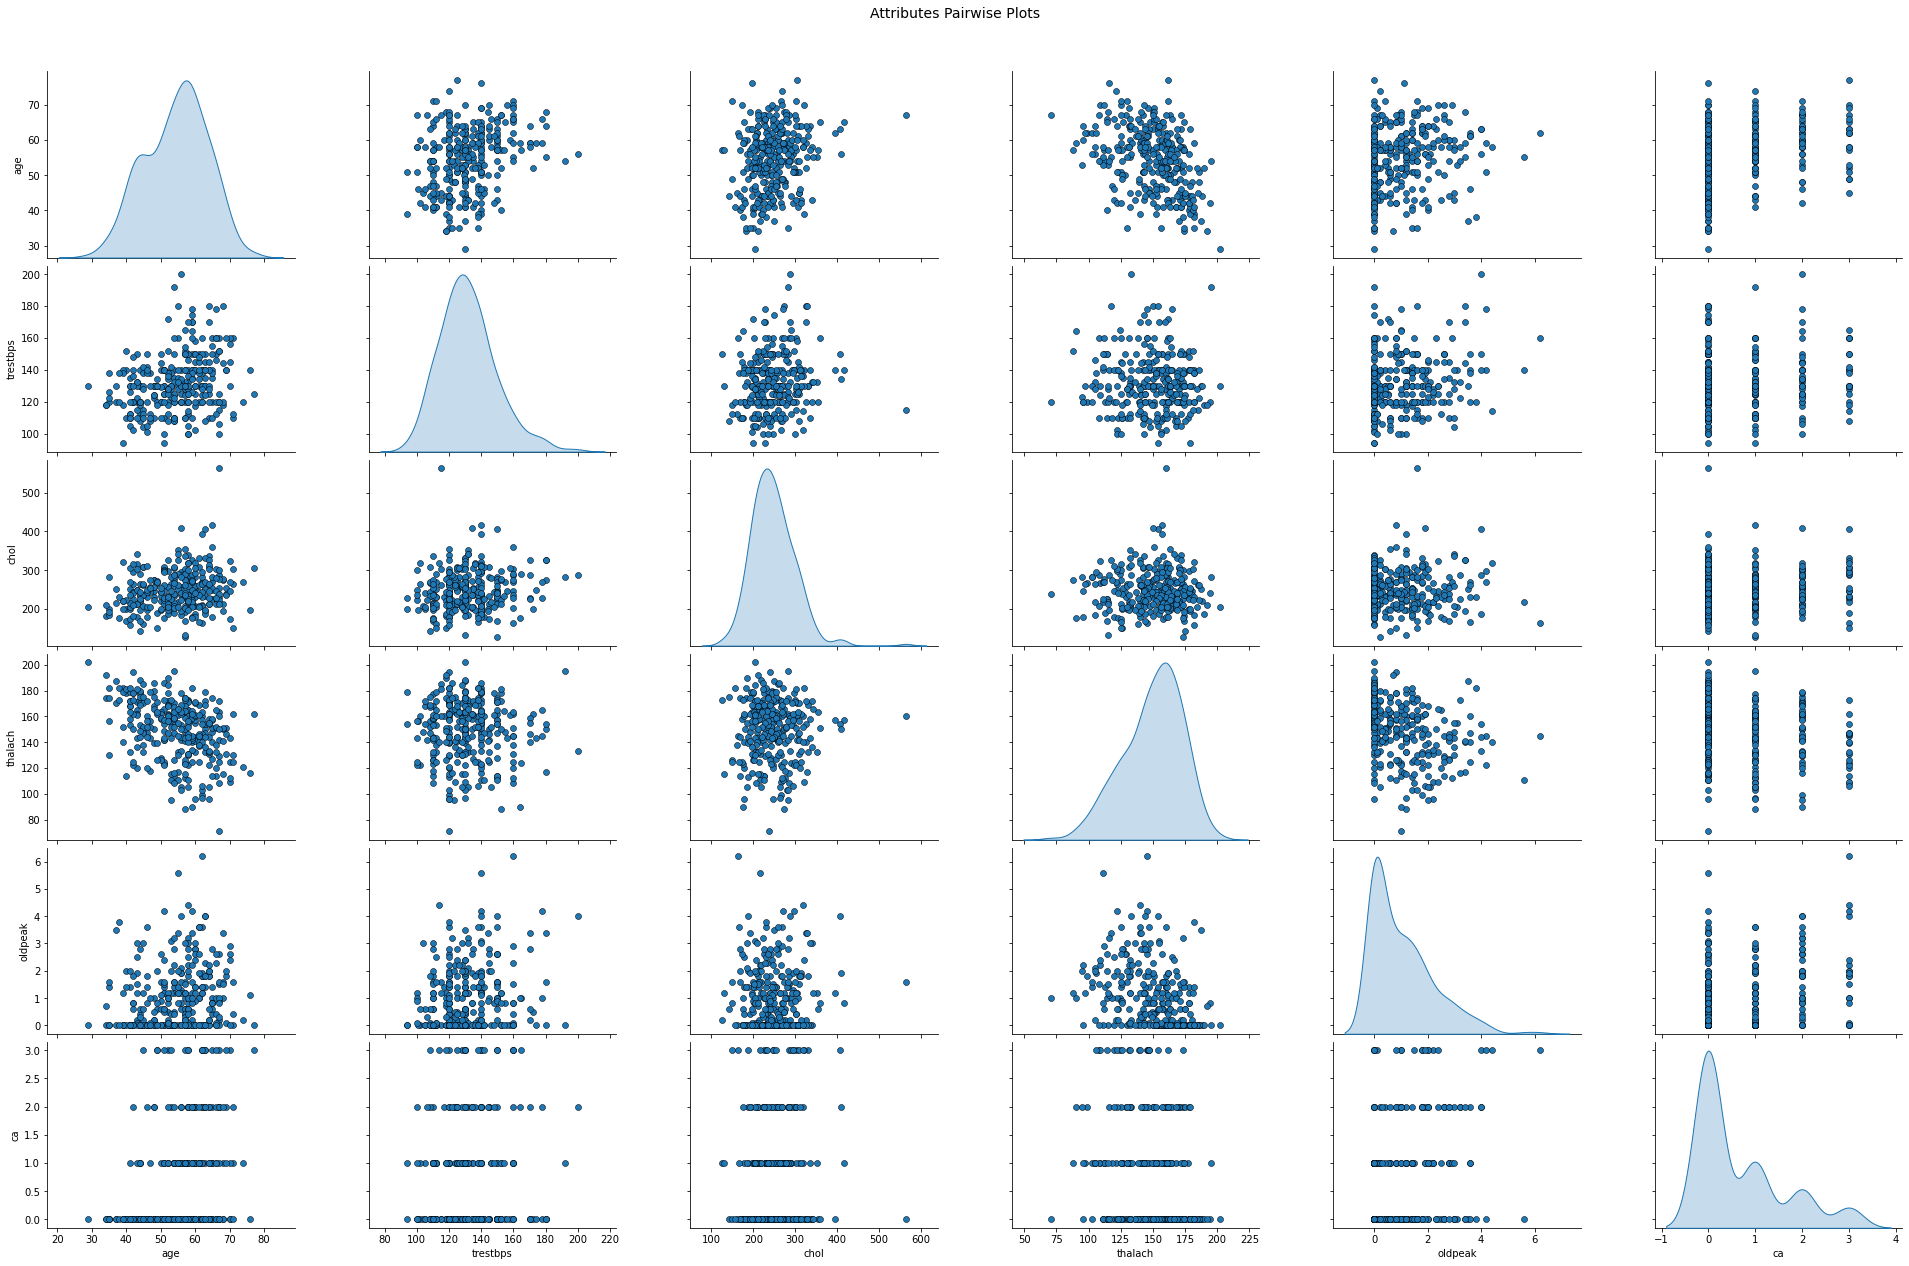

In [162]:
cols = numericalColumns
pp = sns.pairplot(data[cols], height=3.0, aspect=1.5,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Attributes Pairwise Plots', fontsize=14)

print("Interpretation:")
print("  In the heatmap as well as in the pairwise plots, a correlation between age and thalach is observed.")


### Two Continuous Numeric attributes 

Text(0.5, 1.05, 'Age - Thalach')

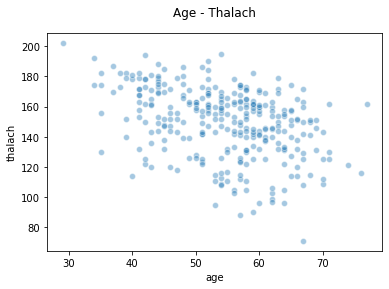

In [163]:
plt.scatter(data['age'], data['thalach'],
            alpha=0.4, edgecolors='w')

plt.xlabel('age')
plt.ylabel('thalach')
plt.title('Age - Thalach',y=1.05)

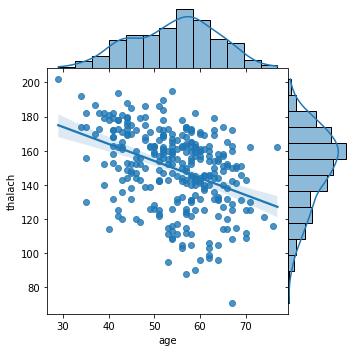

In [164]:
jp = sns.jointplot(x='age', y='thalach', data=data,
              kind='reg', space=0, height=5, ratio=4)


### Two Discrete Categorical attributes 

Interpretation:
  Probability to get high narrowing is higher for males than females.
  Probability to get high narrowing is highest for patients with asymptomatic chest pain.
  Probability to get high narrowing is higher for patients with exercise induced angina.
  Probability to get high narrowing is highest for patients with reversable defect heart disease(?).


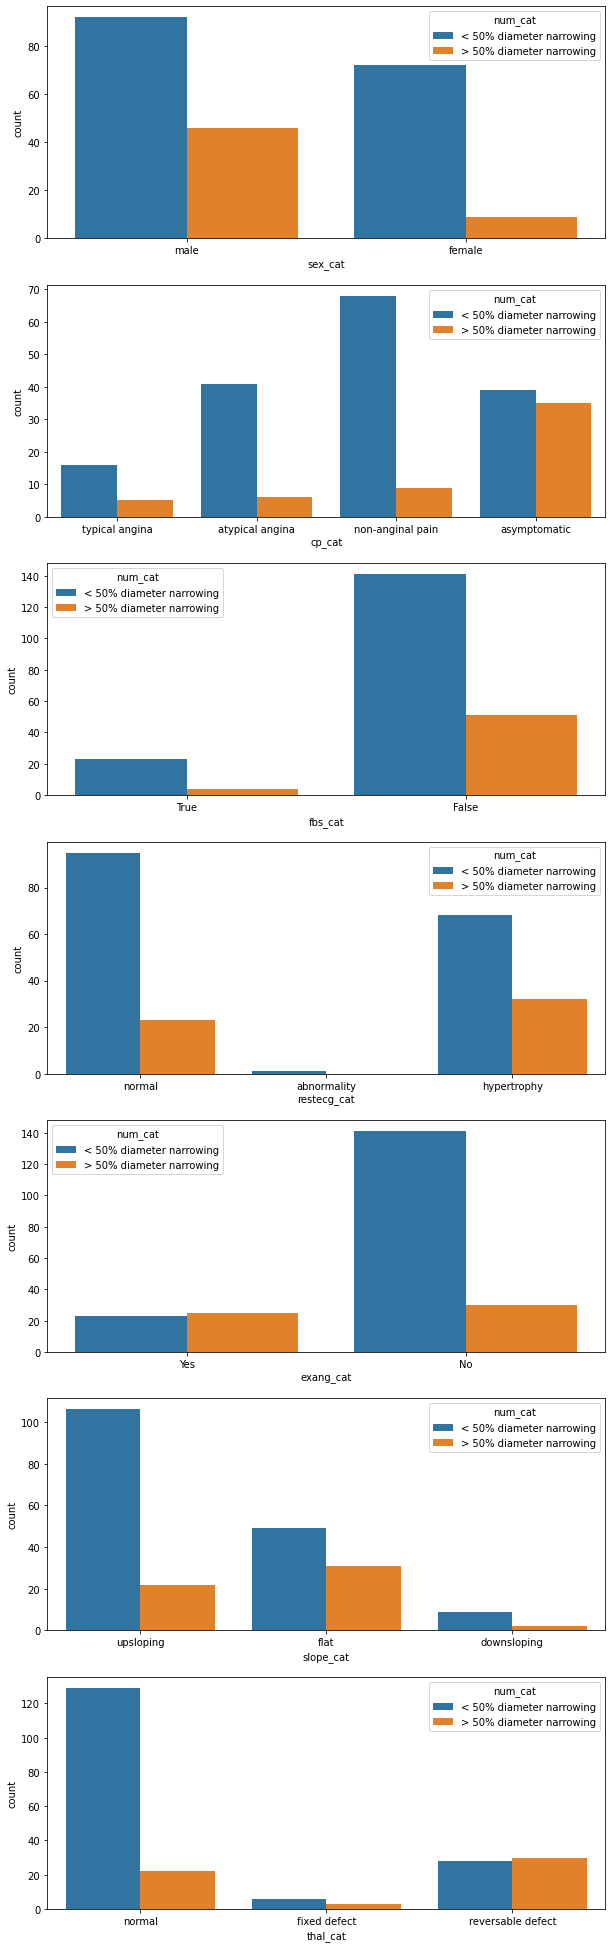

In [165]:

def printFigure(category_a, category_b, ax_idx):
    sns.countplot(x=category_a, hue=category_b, data=data, ax=ax_idx)

#catColumns = ['sex_cat', 'cp_cat', 'fbs_cat']
#combinations = it.product(catColumns, repeat=2)
#num_combinations = math.factorial(len(catColumns))
#print(num_combinations)

combinations = [
    ['sex_cat', 'num_cat'],
    ['cp_cat', 'num_cat'],
    ['fbs_cat', 'num_cat'],
    ['restecg_cat', 'num_cat'],
    ['exang_cat', 'num_cat'],
    ['slope_cat', 'num_cat'],
    ['thal_cat', 'num_cat']
    ]

num_combinations = len(combinations)

num_rows = num_combinations

fig, ax =plt.subplots(num_rows, 1, figsize=(10, 5*num_rows))

idx=0

for cat_a, cat_b in combinations:
    if cat_a == cat_b:
        continue

    printFigure(cat_a, cat_b, ax[idx])
    idx+=1

print("Interpretation:")
print("  Probability to get high narrowing is higher for males than females.")
print("  Probability to get high narrowing is highest for patients with asymptomatic chest pain.")
print("  Probability to get high narrowing is higher for patients with exercise induced angina.")
print("  Probability to get high narrowing is highest for patients with reversable defect heart disease(?).")





### Mixed attributes (numeric & categorical)

Interpretation:
  < 50% -> wider distribution
  > 50% -> more dense around 55 year olds (little older)


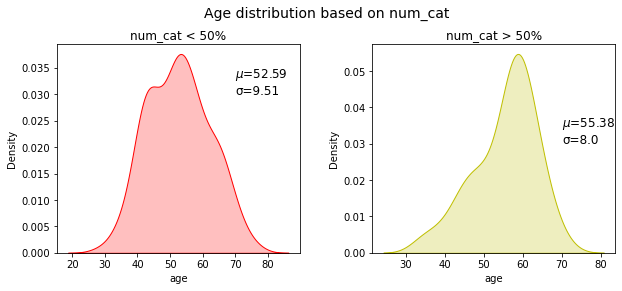

In [166]:
fig = plt.figure(figsize = (10, 4))
title = fig.suptitle("Age distribution based on num_cat", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

attribute = 'age'

subData = data[data['num'] == 0]
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("num_cat < 50%")
ax1.set_xlabel(attribute)
ax1.set_ylabel("Density") 
ax1.text(70, 0.03, r'$\mu$='+str(round(subData[attribute].mean(),2)) + '\n\u03C3='+str(round(subData[attribute].std(),2)), fontsize=12)
sns.kdeplot(subData[attribute], ax=ax1, shade=True, color='r')

subData = data[data['num'] == 1]
ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title("num_cat > 50%")
ax2.set_xlabel(attribute)
ax2.set_ylabel("Density") 
ax2.text(70, 0.03, r'$\mu$='+str(round(subData[attribute].mean(),2)) + '\n\u03C3='+str(round(subData[attribute].std(),2)), fontsize=12)
sns.kdeplot(subData[attribute], ax=ax2, shade=True, color='y')

print("Interpretation:")
print("  < 50% -> wider distribution")
print("  > 50% -> more dense around 55 year olds (little older)")

Interpretation:
  > 50% -> slightly higher mean trestbps but higher standard deviation


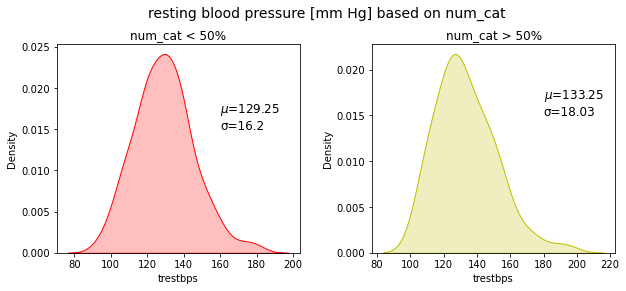

In [167]:
fig = plt.figure(figsize = (10, 4))
title = fig.suptitle("resting blood pressure [mm Hg] based on num_cat", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

attribute = 'trestbps'

subData = data[data['num'] == 0]
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("num_cat < 50%")
ax1.set_xlabel(attribute)
ax1.set_ylabel("Density") 
ax1.text(160, 0.015, r'$\mu$='+str(round(subData[attribute].mean(),2)) + '\n\u03C3='+str(round(subData[attribute].std(),2)), fontsize=12)
sns.kdeplot(subData[attribute], ax=ax1, shade=True, color='r')

subData = data[data['num'] == 1]
ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title("num_cat > 50%")
ax2.set_xlabel(attribute)
ax2.set_ylabel("Density") 
ax2.text(180, 0.015, r'$\mu$='+str(round(subData[attribute].mean(),2)) + '\n\u03C3='+str(round(subData[attribute].std(),2)), fontsize=12)
sns.kdeplot(subData[attribute], ax=ax2, shade=True, color='y')

print("Interpretation:")
print("  > 50% -> slightly higher mean trestbps but higher standard deviation")

Interpretation:
  > 50% -> slightly higher mean trestbps but higher standard deviation


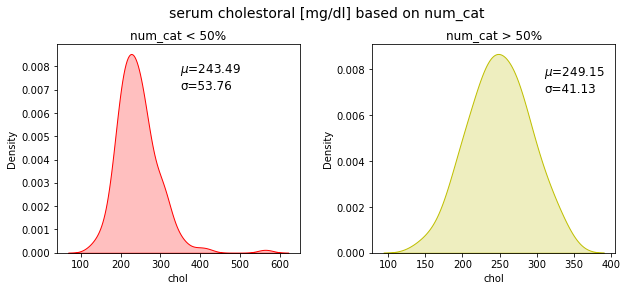

In [71]:
fig = plt.figure(figsize = (10, 4))
title = fig.suptitle("serum cholestoral [mg/dl] based on num_cat", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

attribute = 'chol'

subData = data[data['num'] == 0]
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("num_cat < 50%")
ax1.set_xlabel(attribute)
ax1.set_ylabel("Density") 
ax1.text(350, 0.007, r'$\mu$='+str(round(subData[attribute].mean(),2)) + '\n\u03C3='+str(round(subData[attribute].std(),2)), fontsize=12)
sns.kdeplot(subData[attribute], ax=ax1, shade=True, color='r')

subData = data[data['num'] == 1]
ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title("num_cat > 50%")
ax2.set_xlabel(attribute)
ax2.set_ylabel("Density") 
ax2.text(310, 0.007, r'$\mu$='+str(round(subData[attribute].mean(),2)) + '\n\u03C3='+str(round(subData[attribute].std(),2)), fontsize=12)
sns.kdeplot(subData[attribute], ax=ax2, shade=True, color='y')

print("Interpretation:")
print("  > 50% -> higher mean cholesterin and lower standard deviation")

## Visualizing three dimensions

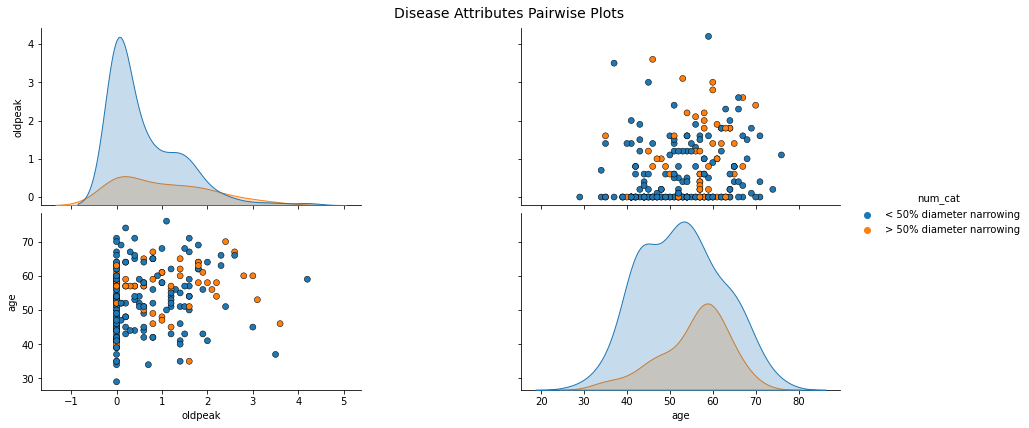

In [125]:
cols = ['oldpeak', 'age', 'num_cat']
pp = sns.pairplot(data[cols], hue='num_cat', height=3, aspect=2, 
                  plot_kws=dict(edgecolor="black", linewidth=0.5))
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.5)
t = fig.suptitle('Disease Attributes Pairwise Plots', fontsize=14)

### Three Continuous Numeric attributes

Text(0.5, 0, 'trestbps')

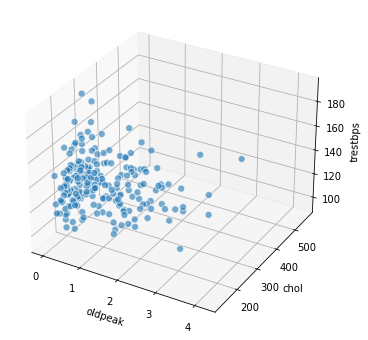

In [129]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

xs = data['oldpeak']
ys = data['chol']
zs = data['trestbps']
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('oldpeak')
ax.set_ylabel('chol')
ax.set_zlabel('trestbps')

Text(0.5, 1.05, 'oldpeak - chol - trestbps')

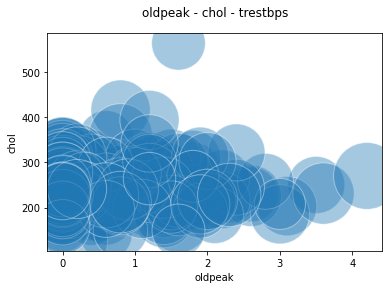

In [131]:
plt.scatter(data['oldpeak'], data['chol'], s=data['trestbps']*25, 
            alpha=0.4, edgecolors='w')

plt.xlabel('oldpeak')
plt.ylabel('chol')
plt.title('oldpeak - chol - trestbps',y=1.05)

### Three Discrete Categorical attributes

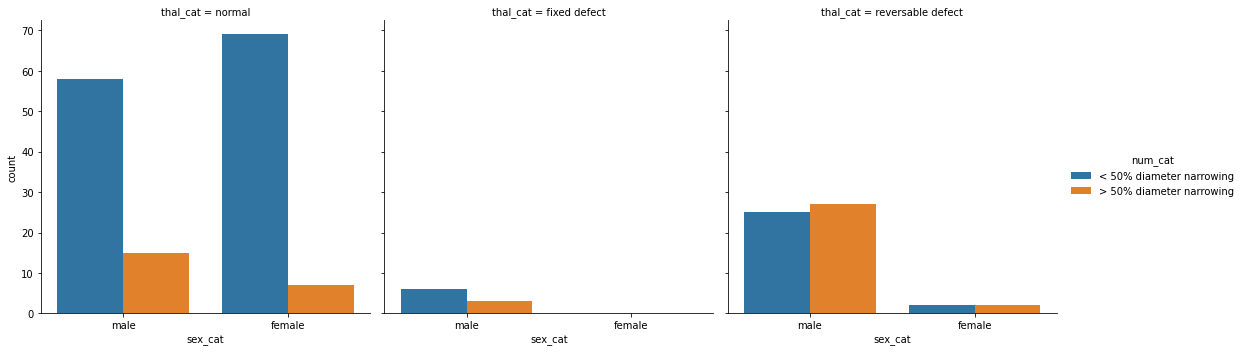

In [151]:
fc = sns.catplot(x="sex_cat", hue="num_cat", col="thal_cat", data=data, kind="count")

### Mixed attributes (Numeric & Categorical)

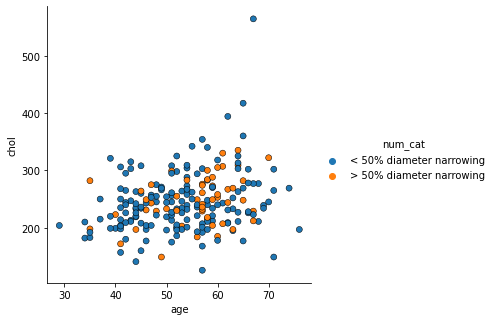

In [135]:
jp = sns.pairplot(data, x_vars=["age"], y_vars=["chol"], height=4.5,
                  hue="num_cat", 
                  plot_kws=dict(edgecolor="k", linewidth=0.5))